In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load the dataset
df = pd.read_csv("../data/telco_customer_churn.csv")

display(df.head(10))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
# Check data types and missing values
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [4]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

Missing values in TotalCharges: 11


In [6]:
# Fill missing values with 0 
df.fillna({'TotalCharges': 0}, inplace=True)

# Remove 'customerID' as it is unique and not predictive
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

# Convert 'SeniorCitizen' to categorical for clearer plotting
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

C:\Users\Diluksha Shamal\AppData\Local\Temp\ipykernel_16972\2135541950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='viridis')


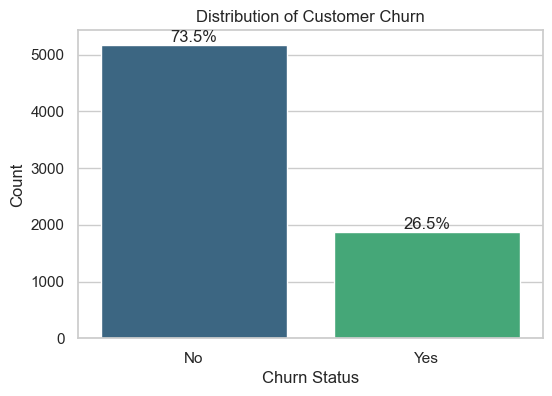

In [7]:
# Plot distribution of Churn
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn Status')
plt.ylabel('Count')

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

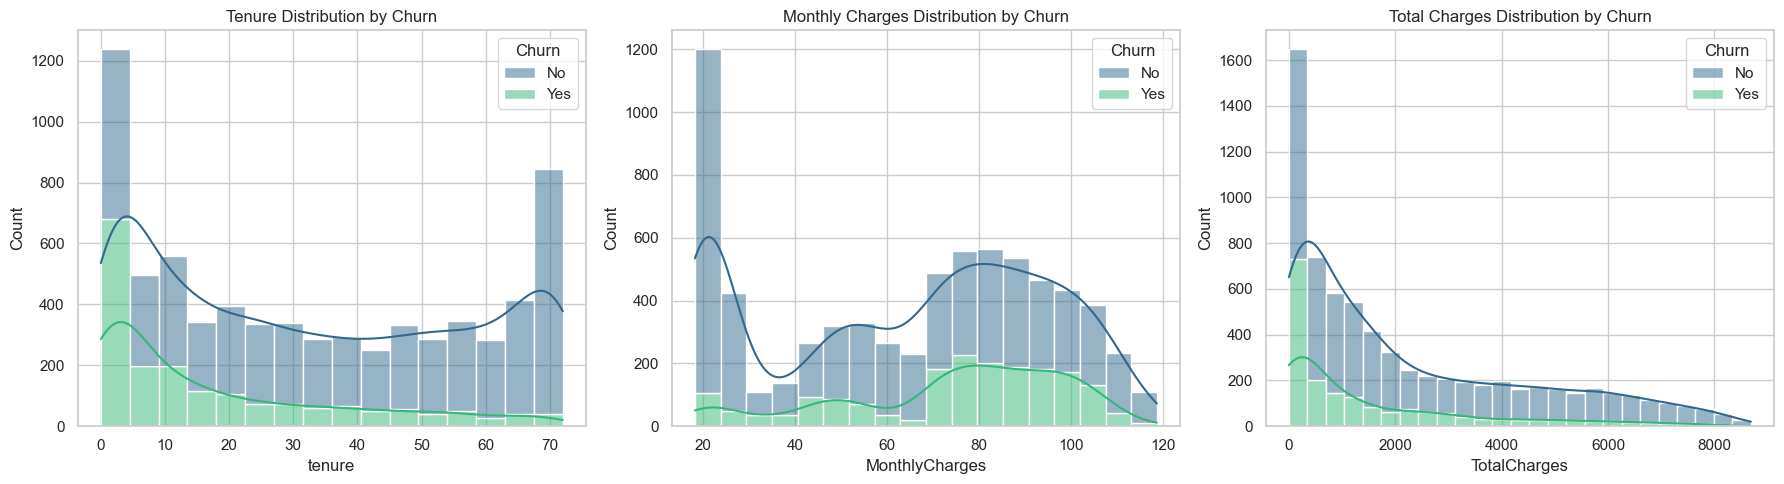

In [8]:
# Plot distributions of numerical features by Churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True, ax=axes[0], palette='viridis')
axes[0].set_title('Tenure Distribution by Churn')

sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True, ax=axes[1], palette='viridis')
axes[1].set_title('Monthly Charges Distribution by Churn')

sns.histplot(data=df, x='TotalCharges', hue='Churn', multiple='stack', kde=True, ax=axes[2], palette='viridis')
axes[2].set_title('Total Charges Distribution by Churn')

plt.tight_layout()
plt.show()

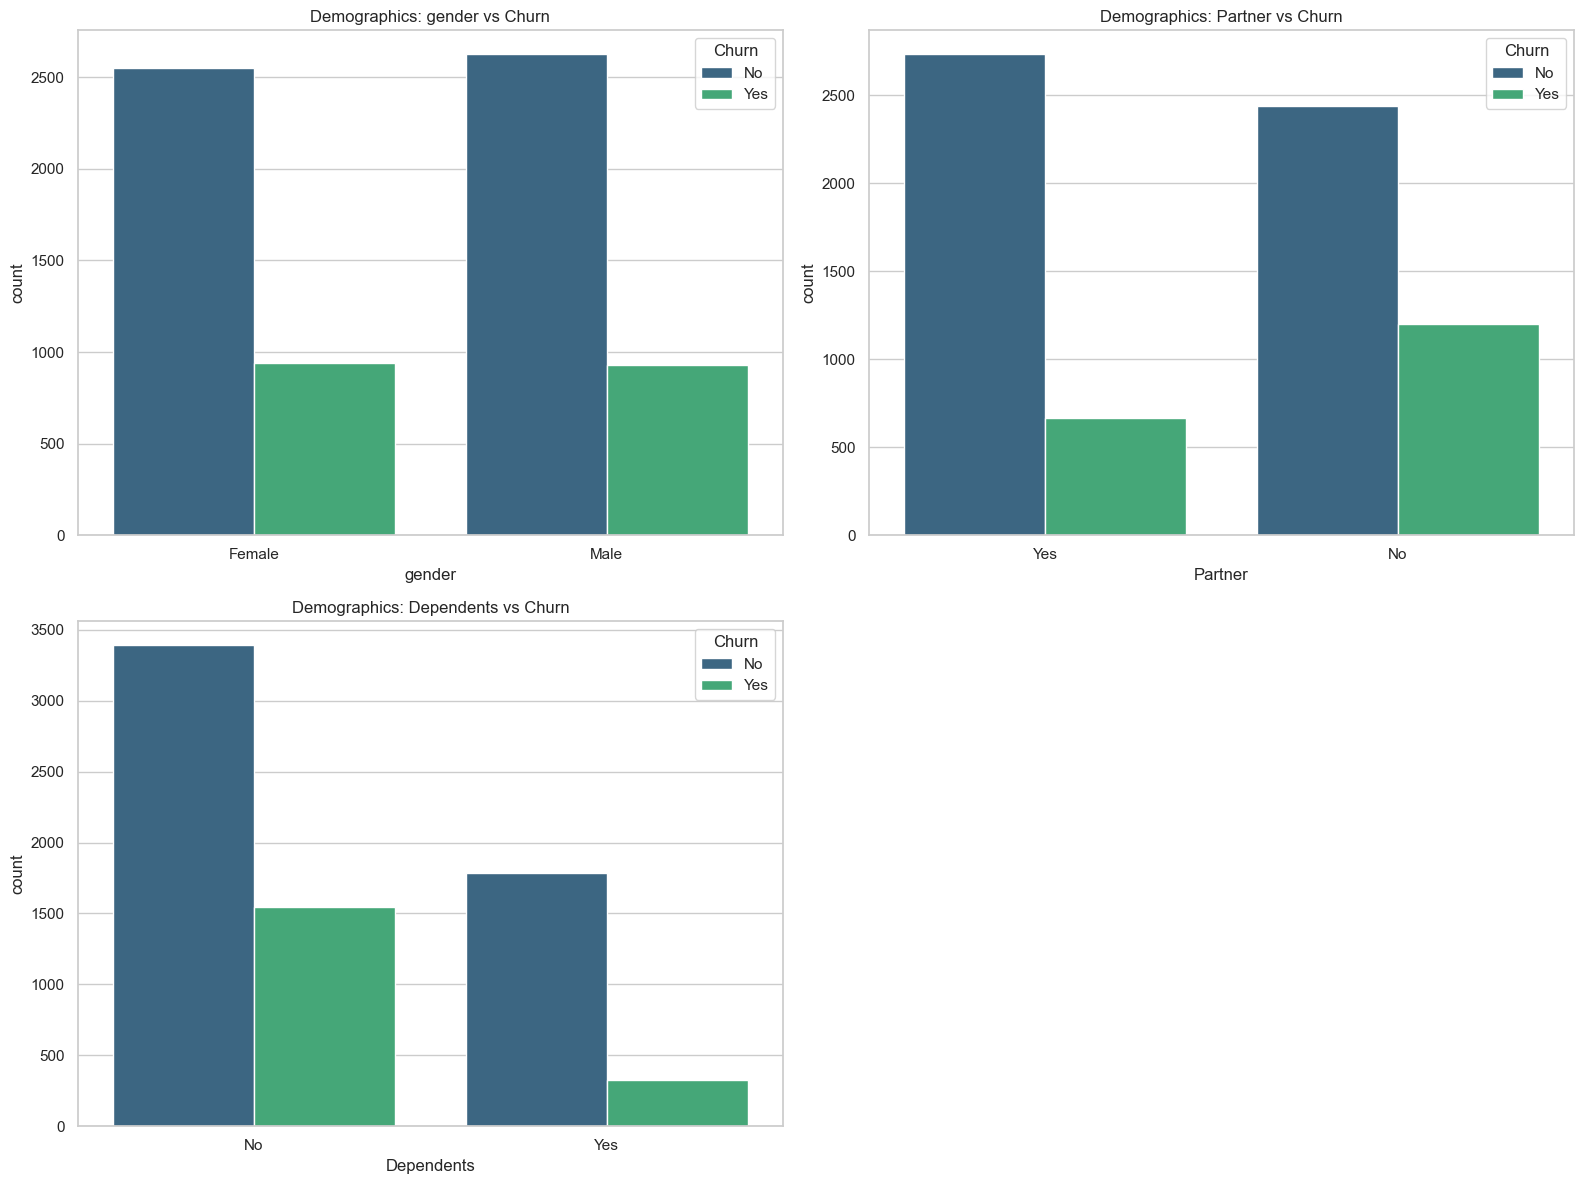

In [9]:
# Define categorical groups
demographics = ['gender', 'Partner', 'Dependents']
services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies']
account = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# Function to plot categorical variables
def plot_categorical(features, title):
    plt.figure(figsize=(16, len(features)*4))
    for i, feature in enumerate(features):
        plt.subplot(len(features)//2 + 1, 2, i+1)
        sns.countplot(x=feature, hue='Churn', data=df, palette='viridis')
        plt.title(f'{title}: {feature} vs Churn')
        plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Plot Demographics
plot_categorical(demographics, 'Demographics')

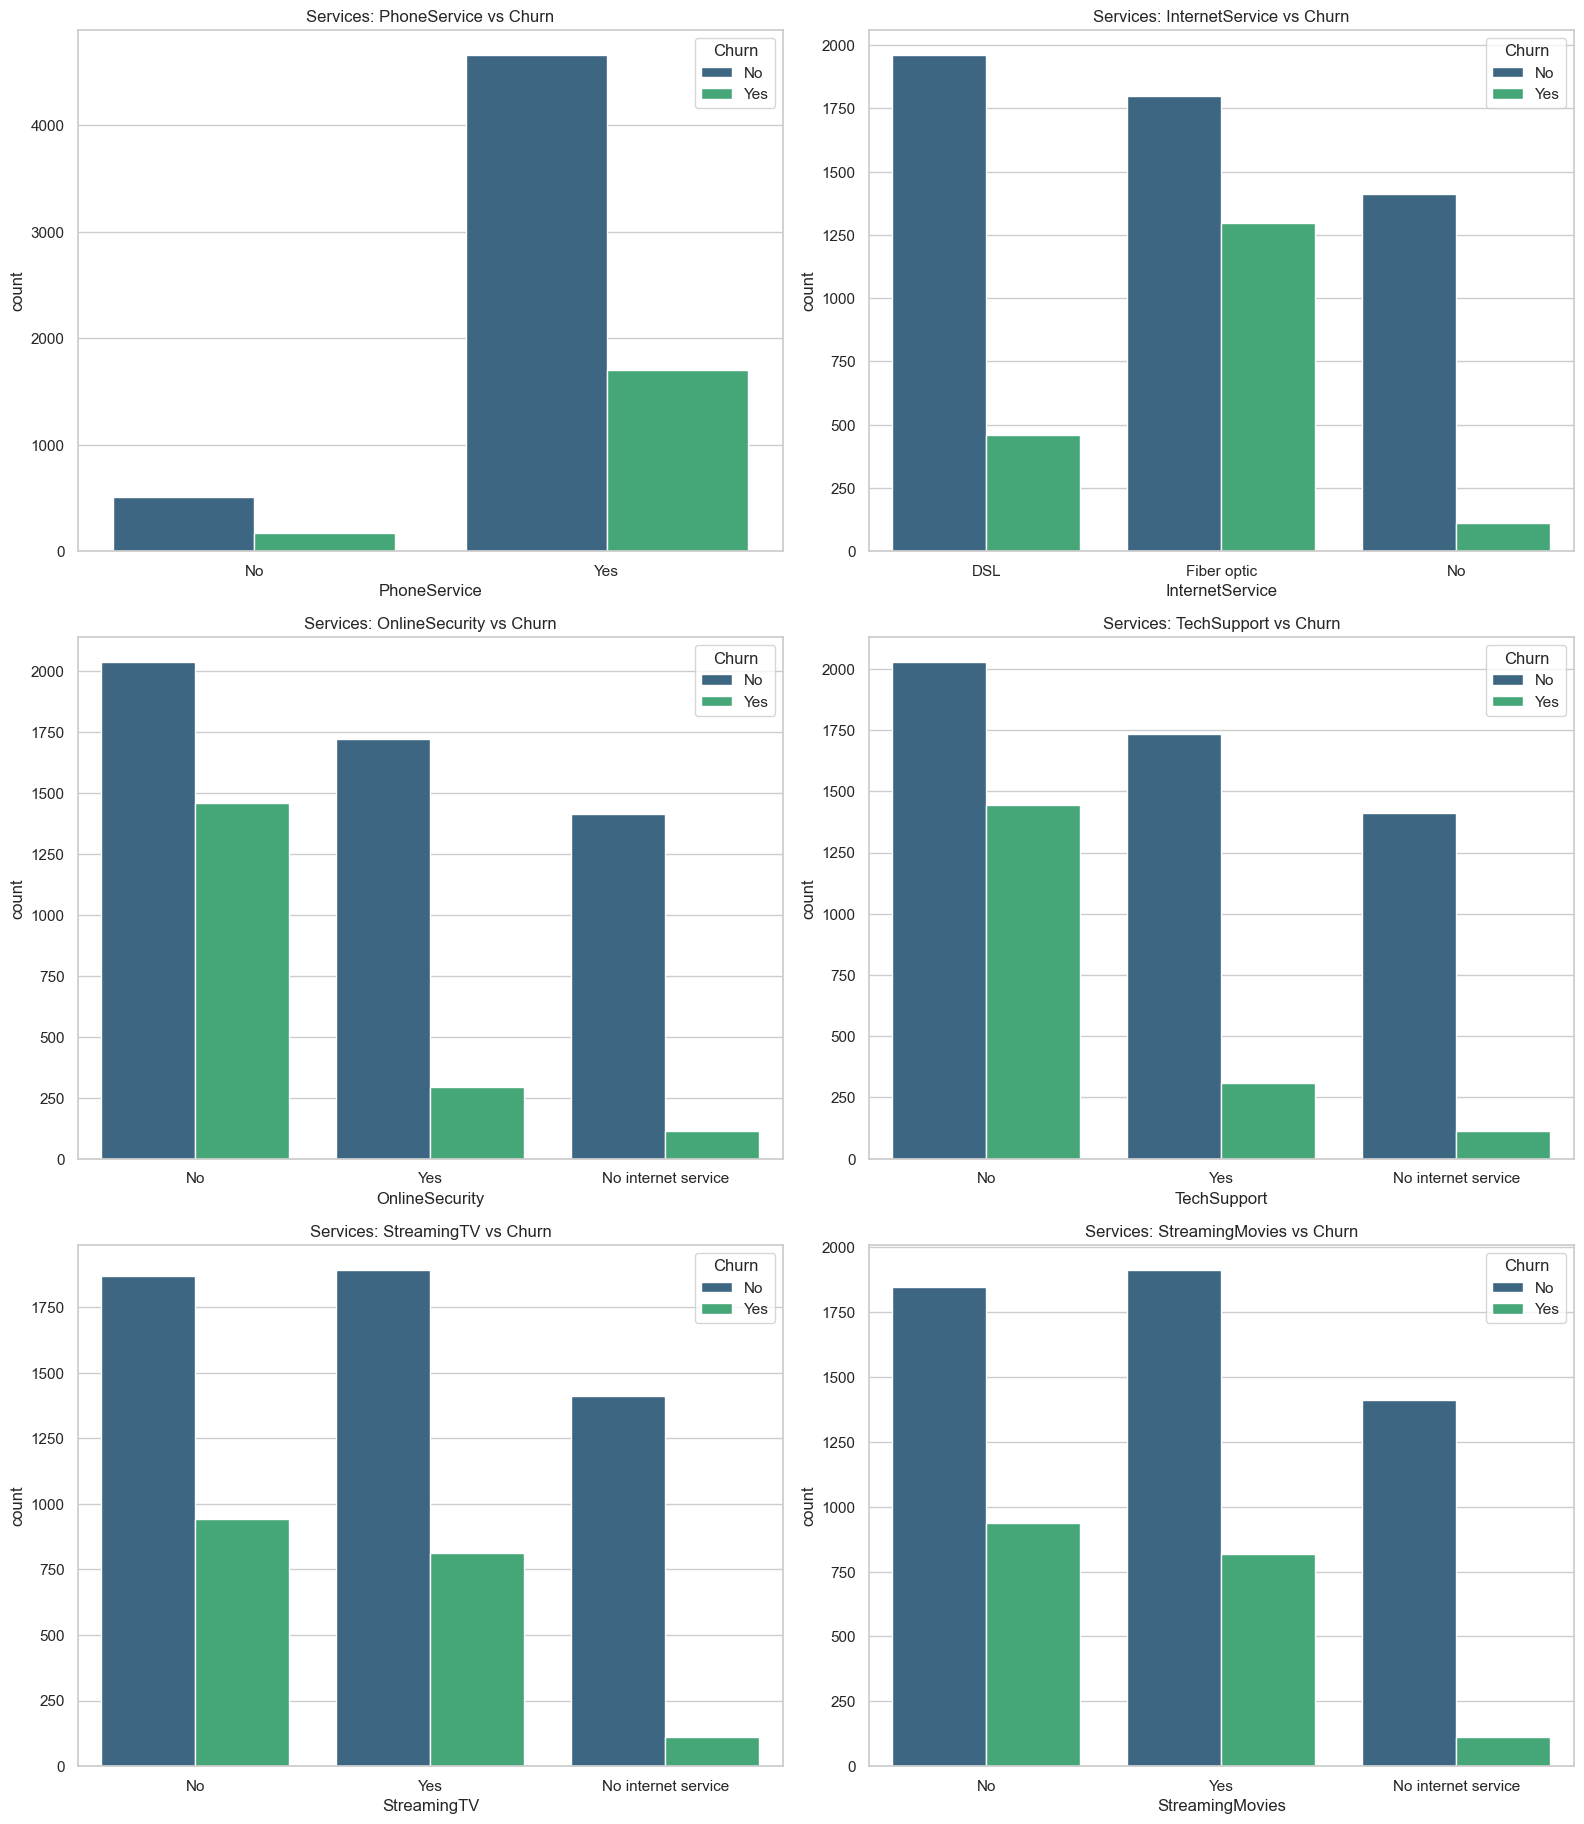

In [10]:
# Plot Services
plot_categorical(services, 'Services')

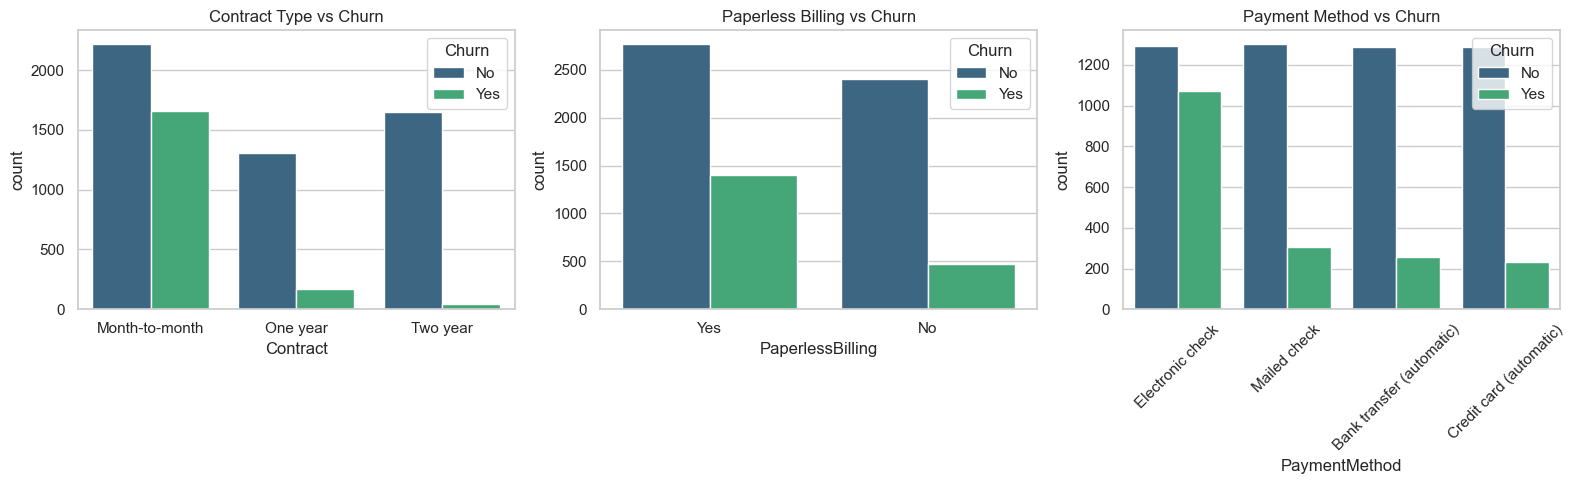

In [11]:
# Plot Account Information
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis')
plt.title('Contract Type vs Churn')

plt.subplot(1, 3, 2)
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, palette='viridis')
plt.title('Paperless Billing vs Churn')

plt.subplot(1, 3, 3)
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='viridis')
plt.title('Payment Method vs Churn')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

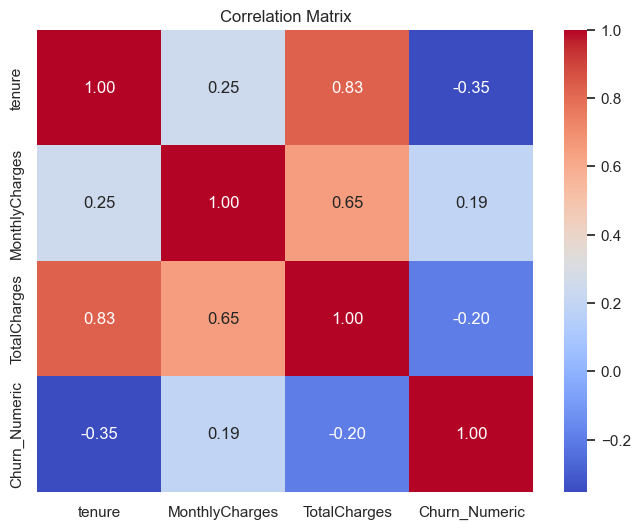

In [12]:
# Convert Churn to numeric for correlation calculation
df['Churn_Numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate correlation
numeric_df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Numeric']]
corr = numeric_df.corr()

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [13]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Numeric
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1
6,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0
7,Female,No,No,No,10,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1
9,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,0


### Outlier Detection — Boxplots (Numerical Features)

Visualize the spread of `tenure`, `MonthlyCharges`, and `TotalCharges` to identify extreme values  
before capping them with the IQR method.

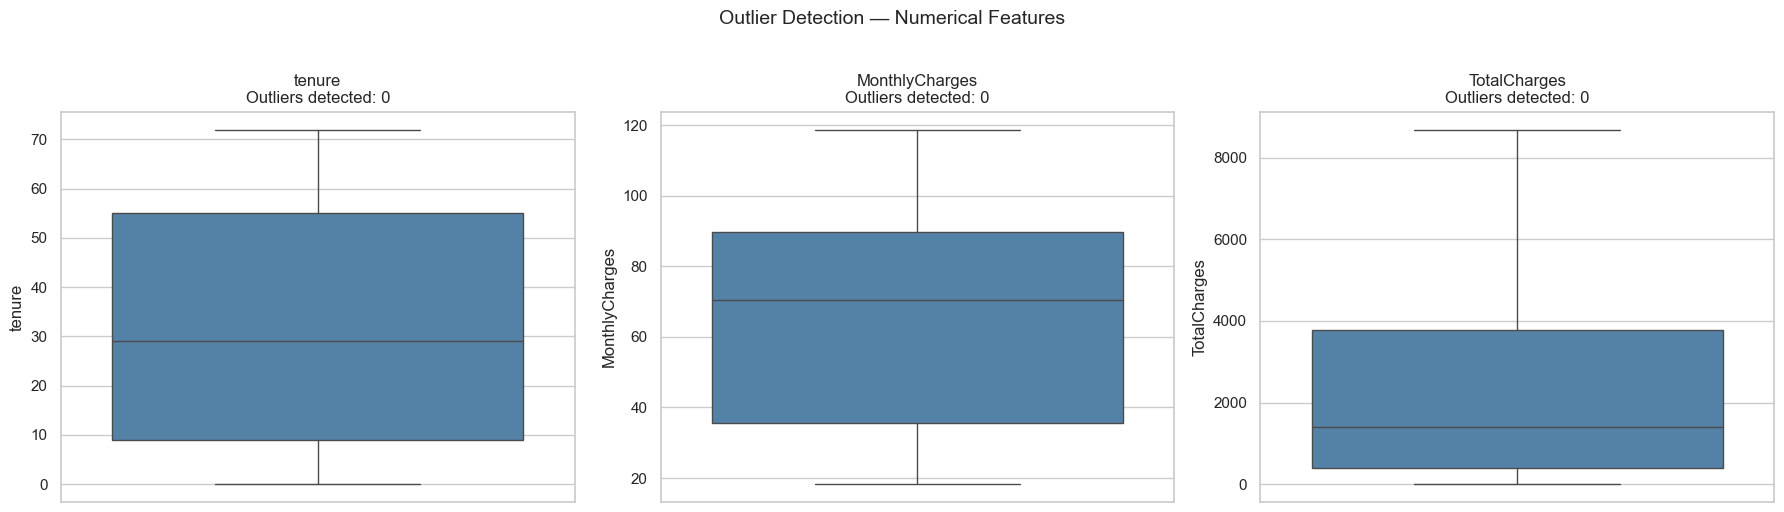


Numerical feature statistics:


,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00
mean,32.37,64.76,2279.73
std,24.56,30.09,2266.79
min,0.00,18.25,0.00
25%,9.00,35.50,398.55
50%,29.00,70.35,1394.55
75%,55.00,89.85,3786.60
max,72.00,118.75,8684.80


In [14]:
# Work on a fresh copy so the original EDA dataframe remains intact
df_processed = df.copy()

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, col in zip(axes, num_cols):
    Q1  = df_processed[col].quantile(0.25)
    Q3  = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_out = ((df_processed[col] < lower) | (df_processed[col] > upper)).sum()

    sns.boxplot(y=df_processed[col], ax=ax, color='steelblue')
    ax.set_title(f'{col}\nOutliers detected: {n_out}')
    ax.set_ylabel(col)

plt.suptitle('Outlier Detection — Numerical Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()
print("\nNumerical feature statistics:")
display(df_processed[num_cols].describe().round(2))

In [15]:
def cap_outliers_iqr(dataframe, columns):
    """Cap values in `columns` to [Q1-1.5*IQR, Q3+1.5*IQR]."""
    df_out = dataframe.copy()
    report = {}
    for col in columns:
        Q1  = df_out[col].quantile(0.25)
        Q3  = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        before = ((df_out[col] < lower) | (df_out[col] > upper)).sum()
        df_out[col] = df_out[col].clip(lower=lower, upper=upper)
        report[col] = {'lower_bound': round(lower, 2),
                       'upper_bound': round(upper, 2),
                       'values_capped': int(before)}
    return df_out, report

df_processed, cap_report = cap_outliers_iqr(df_processed, num_cols)

print("Capping Report:")
for col, stats in cap_report.items():
    print(f"  {col:20s} → lower={stats['lower_bound']:8.2f} | upper={stats['upper_bound']:8.2f} | capped={stats['values_capped']}")

Capping Report:
  tenure               → lower=  -60.00 | upper=  124.00 | capped=0
  MonthlyCharges       → lower=  -46.02 | upper=  171.38 | capped=0
  TotalCharges         → lower=-4683.52 | upper= 8868.67 | capped=0


### Feature Engineering

Two new domain-driven features are created:

| New Feature | Logic | Rationale |
|---|---|---|
| `TenureGroup` | Binned tenure into 5 ordinal bands | Captures lifecycle stage (new → long-term) |
| `AvgMonthlySpend` | `TotalCharges / (tenure + 1)` | Normalised spend per month; avoids div-by-zero |

These provide the model with richer signals than raw numbers alone.

TenureGroup value counts:
TenureGroup
0-12 mo     2186
13-24 mo    1024
25-36 mo     832
37-48 mo     762
49-72 mo    2239
Name: count, dtype: int64


C:\Users\Diluksha Shamal\AppData\Local\Temp\ipykernel_16972\462432649.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TenureGroup', y='Proportion', data=tenure_churn_yes,


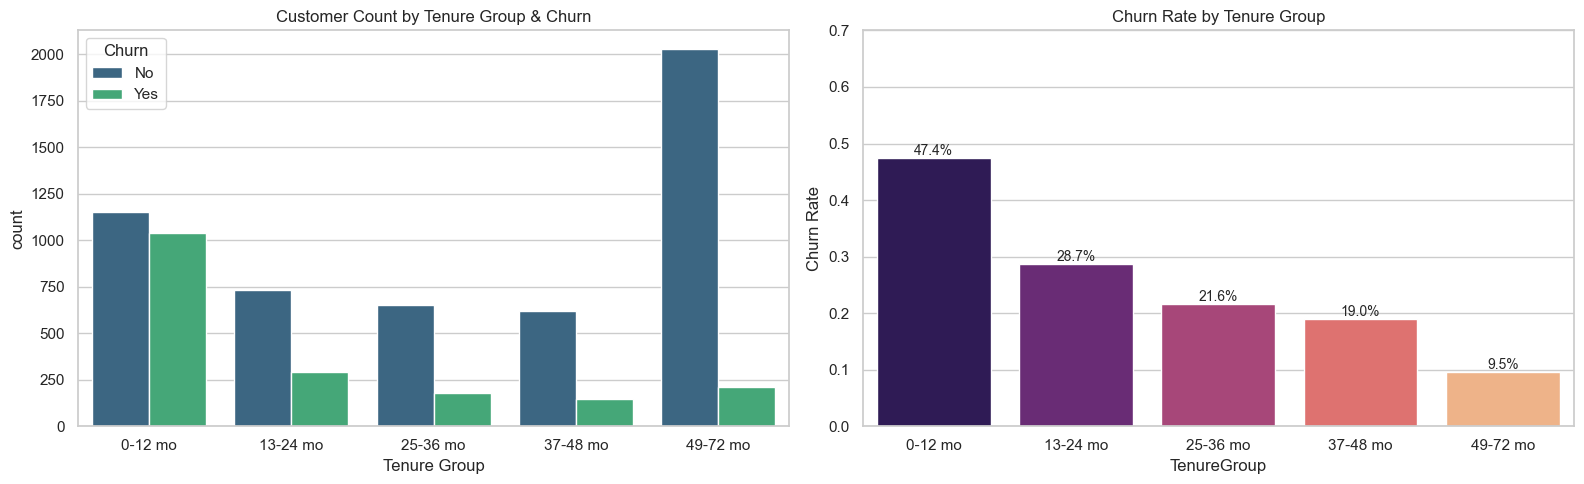


AvgMonthlySpend statistics:


count    7043.00
mean       58.99
std        30.58
min         0.00
25%        26.04
50%        60.94
75%        84.84
max       118.97
Name: AvgMonthlySpend, dtype: float64

In [16]:
# Tenure Grouping (ordinal bins)
bins   = [0, 12, 24, 36, 48, 72]
labels = ['0-12 mo', '13-24 mo', '25-36 mo', '37-48 mo', '49-72 mo']
df_processed['TenureGroup'] = pd.cut(
    df_processed['tenure'], bins=bins, labels=labels, right=True, include_lowest=True
)
print("TenureGroup value counts:")
print(df_processed['TenureGroup'].value_counts().sort_index())

# Average Monthly Spend (avoids division by zero with tenure=0)
df_processed['AvgMonthlySpend'] = (
    df_processed['TotalCharges'] / (df_processed['tenure'] + 1)
).round(2)

# Visualise churn rate per TenureGroup
tenure_churn = (
    df_processed.groupby('TenureGroup', observed=True)['Churn']
    .value_counts(normalize=True)
    .rename('Proportion')
    .reset_index()
)
tenure_churn_yes = tenure_churn[tenure_churn['Churn'] == 'Yes']

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x='TenureGroup', hue='Churn', data=df_processed,
              palette='viridis', ax=axes[0])
axes[0].set_title('Customer Count by Tenure Group & Churn')
axes[0].set_xlabel('Tenure Group')

sns.barplot(x='TenureGroup', y='Proportion', data=tenure_churn_yes,
            palette='magma', ax=axes[1])
axes[1].set_title('Churn Rate by Tenure Group')
axes[1].set_ylabel('Churn Rate')
axes[1].set_ylim(0, 0.7)
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.1%}',
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\nAvgMonthlySpend statistics:")
display(df_processed['AvgMonthlySpend'].describe().round(2))

### Encoding Categorical Features

**Strategy:**
- **Binary (Yes/No)** → Label encode: Yes=1, No=0  
- **"No internet/phone service"** → Simplified to `"No"` (then binary-encoded) — keeps signal without extra dummy columns  
- **Multi-class (≥3 categories)** → One-Hot Encoding with `drop_first=True` to avoid multicollinearity  
- **Ordinal (TenureGroup)** → Manual ordered integer mapping (0 → 4)  
- **Target `Churn`** → already mapped to `Churn_Numeric` (1=Yes, 0=No)

In [17]:
# Columns where "No internet service" or "No phone service" should map to "No"
service_cols_simplify = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]
for col in service_cols_simplify:
    df_processed[col] = df_processed[col].replace(
        {'No internet service': 'No', 'No phone service': 'No'}
    )

# Binary Yes/No columns → 1/0
binary_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'PaperlessBilling',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]
binary_map = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
for col in binary_cols:
    df_processed[col] = df_processed[col].map(binary_map)

# Ordinal encode TenureGroup(one-hot encoding)
tenure_order = {'0-12 mo': 0, '13-24 mo': 1, '25-36 mo': 2,
                '37-48 mo': 3, '49-72 mo': 4}
df_processed['TenureGroup'] = df_processed['TenureGroup'].map(tenure_order)

print("Binary-encoded sample:")
display(df_processed[binary_cols + ['TenureGroup']].head())
print("\nNull check after binary encoding:")
print(df_processed[binary_cols + ['TenureGroup']].isnull().sum())

Binary-encoded sample:


,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,TenureGroup
0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,1,0,0,0,1,0,1,0,1,0,0,0,0,2
2,1,0,0,0,1,1,1,1,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,1,1,0,0,0,3
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0



Null check after binary encoding:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
PaperlessBilling    0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
TenureGroup         0
dtype: int64


#### One-Hot Encoding — Multi-Class Categorical Features

`drop_first=True` drops one dummy column per feature to **avoid the dummy variable trap** (perfect multicollinearity).

| Column | Categories | Dummies created |
|---|---|---|
| `InternetService` | DSL, Fiber optic, No | 2 |
| `Contract` | Month-to-month, One year, Two year | 2 |
| `PaymentMethod` | Electronic check, Mailed check, Bank transfer, Credit card | 3 |

In [18]:
ohe_cols = ['InternetService', 'Contract', 'PaymentMethod']

df_processed = pd.get_dummies(
    df_processed,
    columns=ohe_cols,
    drop_first=True,   # avoids dummy-variable trap
    dtype=int          # keep as integer (0/1) not bool
)

# Drop redundant columns kept from EDA phase
cols_to_drop = ['Churn']          # keep only Churn_Numeric as target
if 'Churn' in df_processed.columns:
    df_processed.drop(columns=['Churn'], inplace=True)

print(f"Shape after OHE: {df_processed.shape}")
print("\nNew dummy columns added:")
new_cols = [c for c in df_processed.columns
            if any(c.startswith(f'{col}_') for col in ohe_cols)]
for c in new_cols:
    print(f"  {c}")
print("\nCurrent dtypes:")
display(df_processed.dtypes.to_frame('dtype').T)

Shape after OHE: (7043, 26)

New dummy columns added:
  InternetService_Fiber optic
  InternetService_No
  Contract_One year
  Contract_Two year
  PaymentMethod_Credit card (automatic)
  PaymentMethod_Electronic check
  PaymentMethod_Mailed check

Current dtypes:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn_Numeric,TenureGroup,AvgMonthlySpend,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
dtype,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,...,int64,category,float64,int64,int64,int64,int64,int64,int64,int64


In [19]:
df_processed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn_Numeric,TenureGroup,AvgMonthlySpend,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,0,14.92,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,2,53.99,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,36.05,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,3,40.02,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,50.55,1,0,0,0,0,1,0


In [20]:
# Fix TenureGroup dtype (category → int)
df_processed['TenureGroup'] = df_processed['TenureGroup'].astype(int)
print(f"TenureGroup dtype: {df_processed['TenureGroup'].dtype}")
print(f"TenureGroup unique values: {sorted(df_processed['TenureGroup'].unique())}")

TenureGroup dtype: int64
TenureGroup unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


### Feature Scaling — StandardScaler

Continuous features have very different scales (`tenure` 0–72, `TotalCharges` 0–8685).  
**StandardScaler** (z-score) ensures that distance-based and gradient-based models treat all features equally.

> Scaled columns: `tenure`, `MonthlyCharges`, `TotalCharges`, `AvgMonthlySpend`  
> Binary / OHE / ordinal columns are left unchanged (already 0/1 or small integers).

Post-scaling statistics (mean ≈ 0, std ≈ 1):


,tenure,MonthlyCharges,TotalCharges,AvgMonthlySpend
mean,-0.0000,-0.0000,-0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001


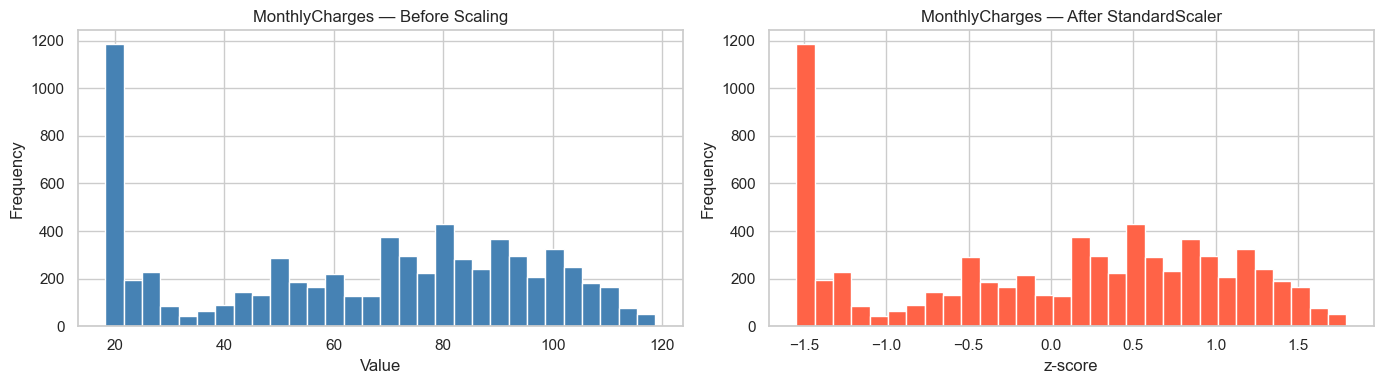

In [21]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlySpend']

scaler = StandardScaler()
df_processed[scale_cols] = scaler.fit_transform(df_processed[scale_cols])

# Verify: mean ≈ 0, std ≈ 1
stats = df_processed[scale_cols].agg(['mean', 'std']).round(4)
print("Post-scaling statistics (mean ≈ 0, std ≈ 1):")
display(stats)

# Visualise before/after distribution for MonthlyCharges
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
df['MonthlyCharges'].plot.hist(bins=30, ax=axes[0], color='steelblue', edgecolor='white')
axes[0].set_title('MonthlyCharges — Before Scaling')
axes[0].set_xlabel('Value')

df_processed['MonthlyCharges'].plot.hist(bins=30, ax=axes[1], color='tomato', edgecolor='white')
axes[1].set_title('MonthlyCharges — After StandardScaler')
axes[1].set_xlabel('z-score')

plt.tight_layout()
plt.show()

### Final Dataset Validation

Full sanity check on the processed dataset before training:
- Shape & column inventory
- Null / infinity audit
- Target class balance (`Churn_Numeric`)
- Data types — every column must be numeric

In [22]:
# # Final Dataset Validation
# print("=" * 55)
# print(f"  Processed Dataset Shape : {df_processed.shape}")
# print(f"  Total Features           : {df_processed.shape[1] - 1}  (excl. target)")
# print(f"  Target Column            : Churn_Numeric")
# print("=" * 55)

# # Null & Infinity check
# null_count = df_processed.isnull().sum().sum()
# inf_count  = np.isinf(df_processed.select_dtypes(include=[np.number])).sum().sum()
# print(f"\n  Null values  : {null_count}")
# print(f"  Inf values   : {inf_count}")

# # Dtype check (all must be numeric)
# non_numeric = df_processed.select_dtypes(exclude=[np.number]).columns.tolist()
# print(f"\n  Non-numeric columns remaining : {non_numeric if non_numeric else 'None ✓'}")

# # Target class balance 
# churn_counts = df_processed['Churn_Numeric'].value_counts()
# churn_pct    = df_processed['Churn_Numeric'].value_counts(normalize=True) * 100
# print(f"\n  Target class balance:")
# print(f"    No Churn  (0): {churn_counts[0]:5d}  ({churn_pct[0]:.1f}%)")
# print(f"    Churned   (1): {churn_counts[1]:5d}  ({churn_pct[1]:.1f}%)")
# print(f"\n  Class Imbalance Ratio  : {churn_counts[0] / churn_counts[1]:.2f} : 1")

# # Column list
# print("\n  All columns in processed dataset:")
# for i, col in enumerate(df_processed.columns, 1):
#     dtype = df_processed[col].dtype
#     print(f"    {i:2d}. {col:45s} {dtype}")

# # Preview
# print("\nFirst 5 rows of processed dataset:")
# display(df_processed.head())

### Feature–Target Correlation Analysis

Rank all features by their **absolute Pearson correlation with `Churn_Numeric`**.  
This helps identify the most predictive features and flags potential weak/redundant ones for feature selection later.

> Note: Class imbalance ratio is **2.77:1** — consider **SMOTE** or **class_weight='balanced'** when training.

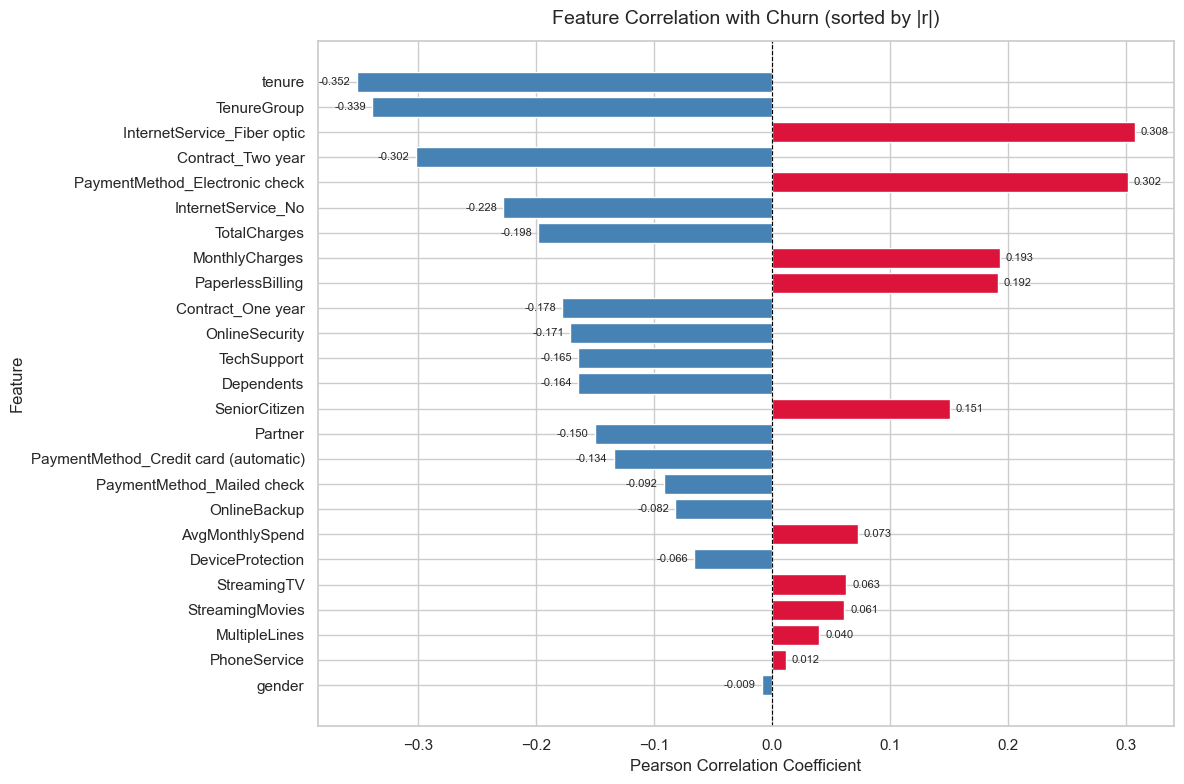


Top 10 features most correlated with Churn:


,Correlation
tenure,-0.352229
TenureGroup,-0.339441
InternetService_Fiber optic,0.308020
Contract_Two year,-0.302253
PaymentMethod_Electronic check,0.301919
InternetService_No,-0.227890
TotalCharges,-0.198324
MonthlyCharges,0.193356
PaperlessBilling,0.191825
Contract_One year,-0.177820


In [23]:
# Feature–Target Correlation Ranking
feature_cols = [c for c in df_processed.columns if c != 'Churn_Numeric']

corr_with_target = (
    df_processed[feature_cols + ['Churn_Numeric']]
    .corr()['Churn_Numeric']
    .drop('Churn_Numeric')
    .sort_values(key=abs, ascending=False)
)

# --- Bar chart ---------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['crimson' if v > 0 else 'steelblue' for v in corr_with_target.values]
bars = ax.barh(corr_with_target.index[::-1],
               corr_with_target.values[::-1],
               color=colors[::-1], edgecolor='white')
ax.axvline(0, color='black', linewidth=0.8, linestyle='--')
ax.set_title('Feature Correlation with Churn (sorted by |r|)', fontsize=14, pad=12)
ax.set_xlabel('Pearson Correlation Coefficient')
ax.set_ylabel('Feature')

for bar, val in zip(bars, corr_with_target.values[::-1]):
    ax.text(val + (0.005 if val >= 0 else -0.005),
            bar.get_y() + bar.get_height() / 2,
            f'{val:.3f}', va='center',
            ha='left' if val >= 0 else 'right', fontsize=8)

plt.tight_layout()
plt.show()

# --- Top 10 table ------------------------------------------------------------
print("\nTop 10 features most correlated with Churn:")
display(corr_with_target.head(10).rename('Correlation').to_frame())

### Save Processed Dataset

Export the cleaned, engineered, encoded and scaled dataset to `data/telco_churn_processed.csv`.  
This file is the **direct input** for all downstream modelling notebooks.

**What's ready for training:**
- ✅ 7043 rows × 25 features + 1 target (`Churn_Numeric`)  
- ✅ All features numeric (int64 / float64)  
- ✅ No missing or infinite values  
- ✅ Continuous features z-score scaled  
- ✅ Categorical features encoded (binary + OHE)  
- ⚠️ Class imbalance present (73.5% vs 26.5%) — handle with SMOTE or `class_weight` in model

In [24]:
# Save Processed Dataset
import os

output_path = '../data/telco_churn_processed.csv'
df_processed.to_csv(output_path, index=False)

file_size_kb = os.path.getsize(output_path) / 1024
print(f"✓ Processed dataset saved to: {output_path}")
print(f"  Shape      : {df_processed.shape}")
print(f"  File size  : {file_size_kb:.1f} KB")
print(f"  Columns    : {list(df_processed.columns)}")

✓ Processed dataset saved to: ../data/telco_churn_processed.csv
  Shape      : (7043, 26)
  File size  : 848.4 KB
  Columns    : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn_Numeric', 'TenureGroup', 'AvgMonthlySpend', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


---

## 6. EDA & Preprocessing Summary

### Key Findings from EDA

| Insight | Detail |
|---|---|
| **Churn Rate** | 26.5% — moderately imbalanced |
| **High-Risk Segment** | New customers (0–12 mo): **47.4% churn rate** |
| **Contract Type** | Month-to-month customers churn far more than 1-year or 2-year |
| **Internet Service** | Fiber optic users churn significantly more (r=+0.31) |
| **Payment Method** | Electronic check strongly associated with churn (r=+0.30) |
| **Tenure** | Strongest negative predictor — longer tenure = lower churn (r=−0.35) |
| **Online Security / TechSupport** | Customers without these churn more |

### Preprocessing Steps Completed

| Step | Action | Result |
|---|---|---|
| Data Cleaning | TotalCharges coercion, customerID drop, SeniorCitizen mapping | Clean base dataset |
| Outlier Handling | IQR capping (0 outliers found) | No data lost |
| Feature Engineering | `TenureGroup` (5 ordinal bins), `AvgMonthlySpend` | +2 features |
| Binary Encoding | 13 Yes/No columns → 0/1; "No X service" simplified | All binary int64 |
| Ordinal Encoding | `TenureGroup` → 0–4 integer scale | Ordered numeric |
| One-Hot Encoding | `InternetService`, `Contract`, `PaymentMethod` (drop_first) | +7 dummy cols |
| Feature Scaling | StandardScaler on 4 continuous features | mean≈0, std≈1 |
| **Output** | `data/telco_churn_processed.csv` — 7043 × 26, fully numeric | **Training-ready** ✅ |

### Next Steps

1. **Train-Test Split** — `train_test_split(stratify=Churn_Numeric, test_size=0.2)`  
2. **Address Class Imbalance** — SMOTE on training set only, or `class_weight='balanced'`  
3. **Baseline Model** — Logistic Regression with all 25 features  
4. **Advanced Models** — Random Forest, XGBoost (feature importances will refine feature selection)  
5. **Feature Selection** — Drop `gender` (r=−0.009), consider VIF analysis for multicollinearity